In [1]:
import matplotlib.pyplot as plt
import csv, glob, os

In [2]:
L_indices = [35, 45]
base_directories = ['../report_ts_' + str(L_index) for L_index in L_indices]


problem_name = 'benchmark'

In [3]:
global_directories = [ [os.path.join(base_directory, problem_name + '_L_test_ts_' + str(L_index) + '_steps_' + str(id) + '_LSCHEME') for id in range(9, 100, 10)] for L_index, base_directory in zip(L_indices, base_directories) ]
ids = list(range(9, 100, 10))

In [4]:
global_scheme_iterations_collection = [{} for L in L_indices]
global_scheme_time_collection = [{} for L in L_indices]
global_total_iterations = [list() for L in L_indices]

In [5]:
for total_iterations, scheme_iterations_collection, scheme_time_collection, directories in zip( global_total_iterations, global_scheme_iterations_collection, global_scheme_time_collection, global_directories ):
    for directory, id in zip(directories, ids):
        file = glob.glob(os.path.join(directory, '*_' + problem_name +'*.csv'))[0]
        print('Processing directory ' + directory + ' with id=' + str(id))

        scheme_iterations_collection[id] = list()
        scheme_time_collection[id] = list()
        total_iterations.append(int(0))

        with open(file, 'r') as csvfile:
            lines = csv.reader(csvfile, delimiter=',')
            next(lines)

            time = 0
            saved_iterations = 0

            for line in lines:
                if time != line[0]:
                    scheme_iterations_collection[id].append(saved_iterations)
                    scheme_time_collection[id].append(time)
                    total_iterations[-1] += int(saved_iterations)

                    time = line[0]
                saved_iterations = int(line[1])
            
            scheme_iterations_collection[id].append(saved_iterations)
            scheme_time_collection[id].append(time)
            total_iterations[-1] += saved_iterations
    print('')

Processing directory ../report_ts_35/benchmark_L_test_ts_35_steps_9_LSCHEME with id=9
Processing directory ../report_ts_35/benchmark_L_test_ts_35_steps_19_LSCHEME with id=19
Processing directory ../report_ts_35/benchmark_L_test_ts_35_steps_29_LSCHEME with id=29
Processing directory ../report_ts_35/benchmark_L_test_ts_35_steps_39_LSCHEME with id=39
Processing directory ../report_ts_35/benchmark_L_test_ts_35_steps_49_LSCHEME with id=49
Processing directory ../report_ts_35/benchmark_L_test_ts_35_steps_59_LSCHEME with id=59
Processing directory ../report_ts_35/benchmark_L_test_ts_35_steps_69_LSCHEME with id=69
Processing directory ../report_ts_35/benchmark_L_test_ts_35_steps_79_LSCHEME with id=79
Processing directory ../report_ts_35/benchmark_L_test_ts_35_steps_89_LSCHEME with id=89
Processing directory ../report_ts_35/benchmark_L_test_ts_35_steps_99_LSCHEME with id=99

Processing directory ../report_ts_45/benchmark_L_test_ts_45_steps_9_LSCHEME with id=9
Processing directory ../report_ts_4

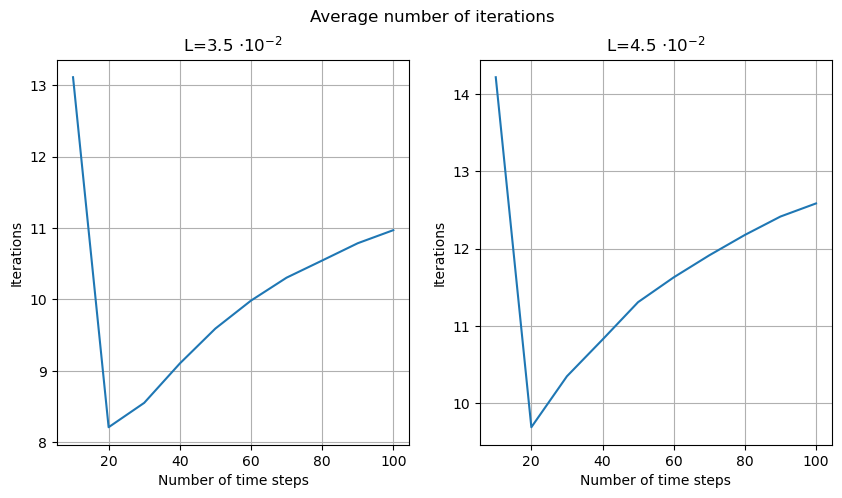

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


fig.suptitle('Average number of iterations')

for L_index, total_iterations, ax in zip(L_indices, global_total_iterations, axs):
    ax.plot([id+1 for id in ids], [total_iteration / id for total_iteration,id in zip(total_iterations, ids)])
    ax.set_title('L=' + str(L_index / 10) + ' $\cdot 10^{-2}$')
    ax.set_xlabel('Number of time steps')
    ax.set_ylabel('Iterations')
    ax.grid()

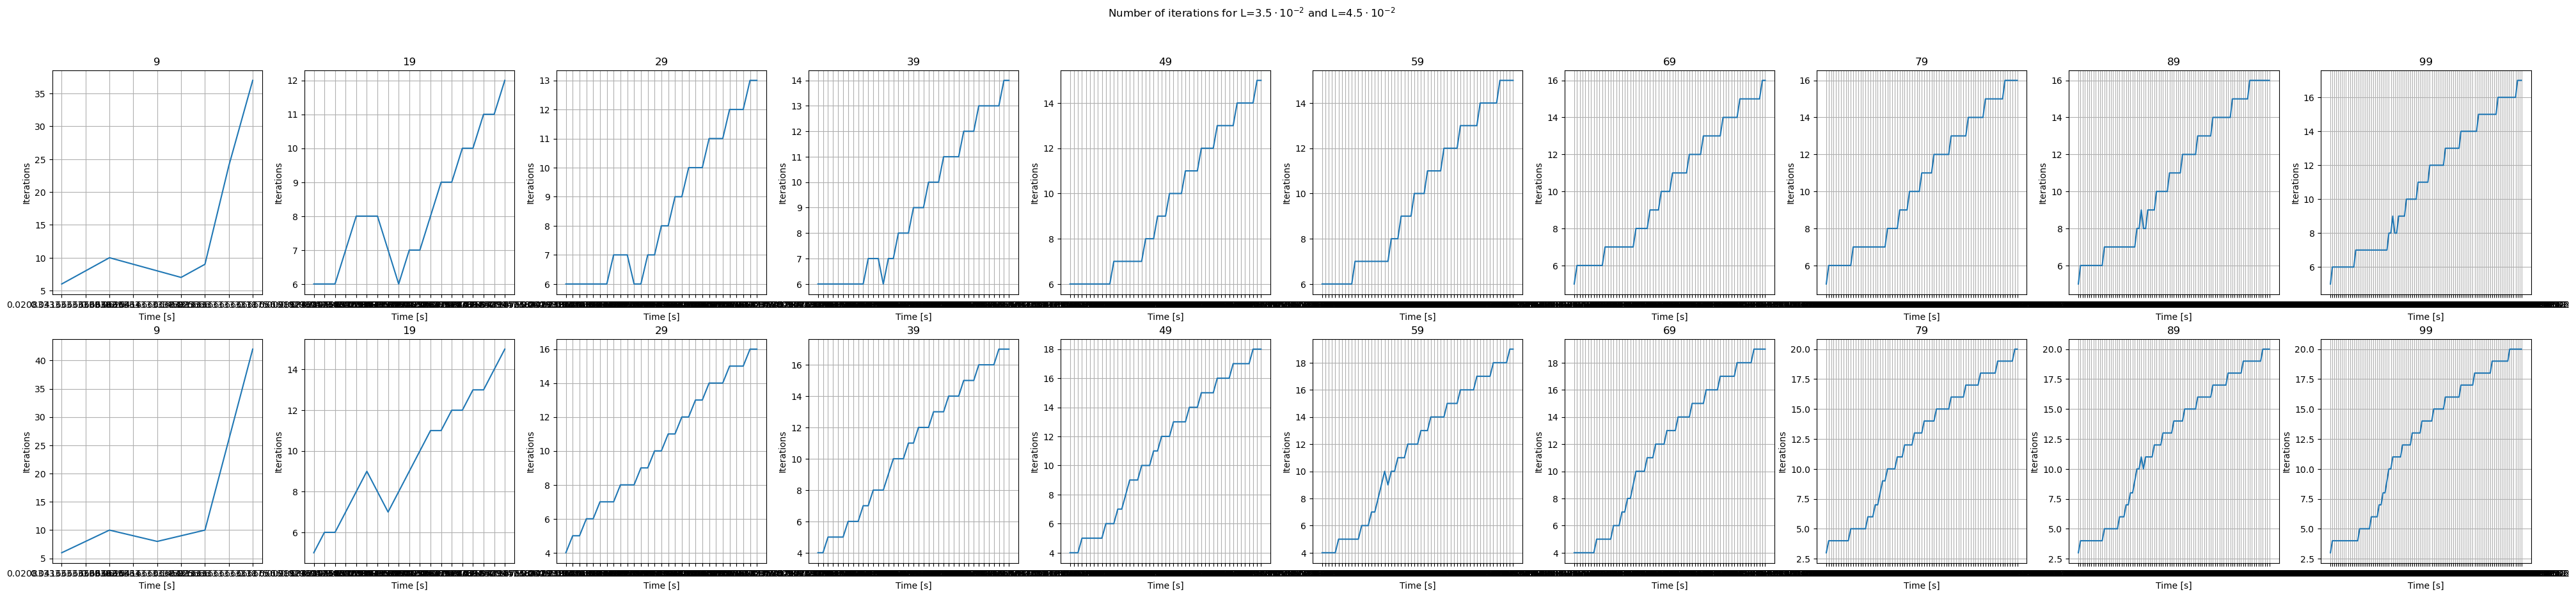

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=10, figsize=(50, 10))

fig.suptitle('Number of iterations for L=$3.5 \cdot 10^{-2}$ and L=$4.5 \cdot 10^{-2}$')

for L_index, ax_row, scheme_iterations_collection, scheme_time_collection in zip(L_indices, axs, global_scheme_iterations_collection, global_scheme_time_collection):

    for ax, id in zip(ax_row, ids):

        ax.set_title(str(id))
        ax.set_xlabel('Time [s]')
        ax.set_ylabel('Iterations')
        ax.grid()
        ax.plot(scheme_time_collection[id][1:], scheme_iterations_collection[id][1:])